# A Project On SARIMAX Model

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

#### Reading the original data

In [51]:
data=pd.read_csv("RestaurantVisitors.csv",index_col=0,parse_dates=True)
data.index.freq='D'

In [52]:
data.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [54]:
print(data.shape)
data.tail()

(517, 8)


,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


#### Making another dataframe of the clean data (without any null values)

In [5]:
df=data.dropna()

In [68]:
#converting rest1,rest2,rest3,rest4 to integer type
col=['rest1', 'rest2', 'rest3','rest4', 'total']
for i in col:
    df[i]=df[i].astype(int)

In [69]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


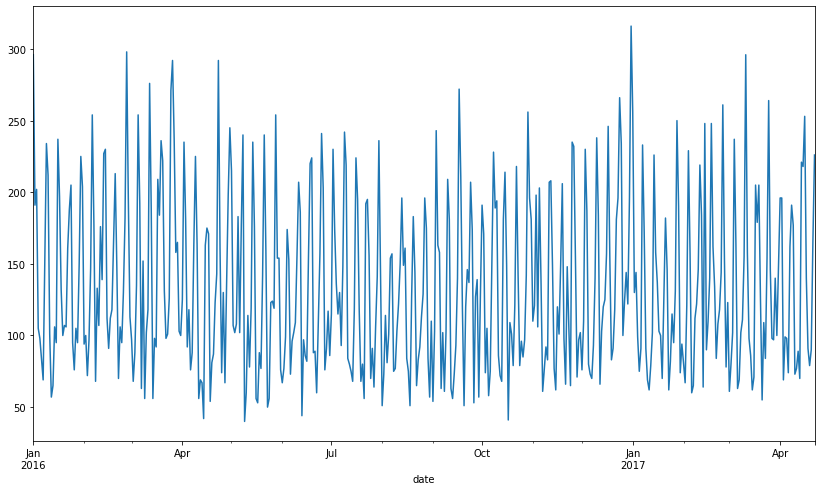

In [70]:
#plotting the data 
df['total'].plot(figsize=(14,8))

#### Performing training and testing split

In [18]:
train=df.iloc[:436]
test=df.iloc[436:]

#### Choosing the order of the SARIMAX by automation techniques

In [31]:
#choosing the order with the exogenous variable
auto_arima(df['total'],seasonal=True,m=7,trace=True,exogenous=df[['holiday']]).summary()

Performing stepwise search to minimize aic


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.54 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5235.582, Time=0.20 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4785.912, Time=1.83 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=4969.638, Time=1.46 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6068.575, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5171.193, Time=0.58 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=inf, Time=3.97 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4744.214, Time=1.73 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=4990.373, Time=1.22 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=4.22 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4806.613, Time=3.15 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4887.554, Time=2.58 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=4.48 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4836.311, Time=1.70 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=5161.709, Time=2.53 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=2.47 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=4678.592, Time=2.25 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=4785.247, Time=1.47 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=inf, Time=3.52 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=4839.150, Time=3.36 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=5107.841, Time=0.85 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=4876.295, Time=2.44 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=4704.122, Time=3.40 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=3.97 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=4849.746, Time=2.70 sec


C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.17 sec
 ARIMA(0,0,1)(1,0,1)[7]             : AIC=inf, Time=1.18 sec

Best model:  ARIMA(0,0,1)(1,0,1)[7] intercept
Total fit time: 64.260 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2333.296
Date:                           Mon, 16 Nov 2020   AIC                           4678.592
Time:                                   14:03:28   BIC                           4703.610
Sample:                               01-01-2016   HQIC                          4688.428
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.6625      2.280      4.676      0.000       6.193      15.132
holiday       72.7515      4.396     16.550      0.000      64.136      81.367
ma.L1          0.1619      0.047      3.441      0.001       0.070       0.254
ar.S.L7        0.9083      0.019     48.649      0.000       0.872       0.945
ma.S.L7       -0.6356      0.056    -11.437      0.000      -0.745      -0.527
sigma2       963.1745     62.411     15.433      0.000     840.851    1085.498
===================================================================================
Ljung-Box (Q):                      102.64   Jarque-Bera (JB):                 8.26
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.89   Skew:                             0.27
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
#order of the model
order=(0, 0, 1)
seasonal_order=(1, 0, 1, 7)

#### Train our SARIMAX model

In [33]:
model=SARIMAX(train['total'],exog=train[['holiday']],order=order,seasonal_order=seasonal_order).fit()
model.summary()

#### Predicted the prediction on basis of test data

In [72]:
start=len(train)
end=len(train)+len(test)-1
test_prediction=model.predict(start=start,end=end,exog=test[['holiday']]).rename('test_prediction')

#### Plotting the training data 

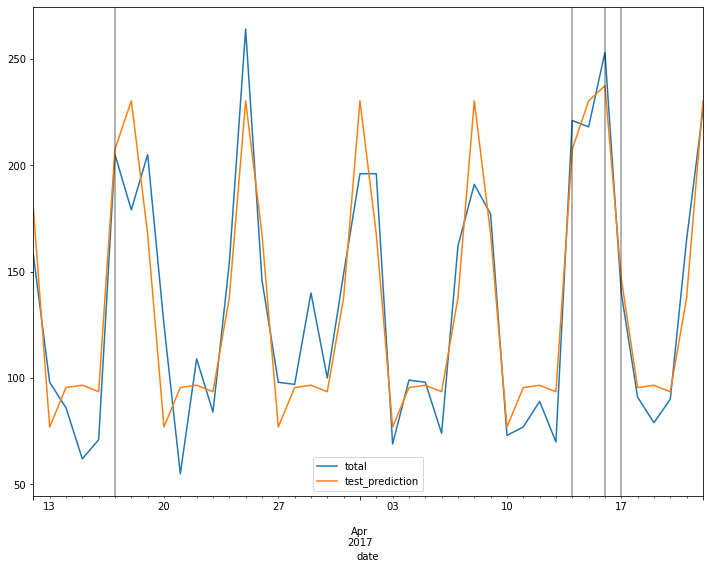

In [49]:
ax=test['total'].plot(figsize=(12,9),legend=True)
test_prediction.plot(legend=True)
for i in test.query('holiday==1').index:
    ax.axvline(x=i,color='k',alpha=.4)

These verticles black lines means that there is a holiday that day

#### Evaluating the model

In [41]:
np.sqrt(mean_squared_error(test['total'],test_prediction))

23.22551954366976

Seems to be a good model overall

#### Now fitting the model on entire data and try to forecast the data

In [73]:
#fitting the sarimax model
final_model=SARIMAX(df['total'],exog=df[['holiday']],order=order,seasonal_order=seasonal_order).fit()

In [75]:
#exogneous variable needed the future data which is to be predicted so our original data has that data
exog_future=data[['holiday']].iloc[478:]
exog_future

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0
2017-04-28,0
2017-04-29,0
2017-04-30,0
2017-05-01,0


#### Making the future prediction based on the model

In [62]:
prediction=final_model.predict(start=len(df),end=len(df)+38,exog=exog_future).rename('SARIMAX forecast')

#### Plotting the forecasted data

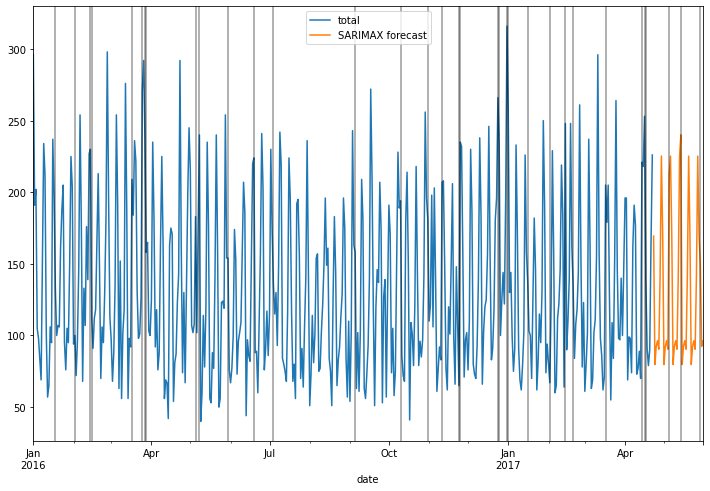

In [67]:

ax=df['total'].plot(figsize=(12,8),legend=True)
prediction.plot(legend=True)
for i in data.query('holiday==1').index:
    ax.axvline(x=i,color='k',alpha=.4)

Thank for looking